# Mapping Urban Expansion in Abidjan and Analyzing its Impact on Natural Resources

## Step 1: Understanding the Context and Data Collection

### 1. Urban Context of Abidjan
- Abidjan is undergoing rapid urbanization, affecting forests and wetlands.
- Key issues: loss of green spaces, pollution, and resource management.

### 2. Earth Observation Data with Dunia
- **Dunia** provides access to satellite imagery, including **Copernicus Sentinel** data.
- Collect imagery covering periods (e.g., 2000, 2010, 2024).
- **Key datasets**:
  - Multispectral satellite images.
  - Land use maps from **OpenStreetMap** or other sources.

---

## Step 2: Preprocessing and Analyzing Satellite Images

### 1. Image Preprocessing
- **Geographic alignment** of satellite images.
- **Atmospheric correction** to reduce interference.
- Crop the area to focus on the Abidjan urban zone.

### 2. Supervised Classification
- Use **Random Forest** or **SVM** to classify areas into urban/non-urban.
- Dunia enables **scalable processing** for large urban areas like Abidjan.

---

## Step 3: Monitoring Urban Expansion and Natural Resource Analysis

### 1. Mapping Urban Expansion
- **Change rate**: Compare images from different periods (e.g., 2000-2024).
- Use **difference maps** to visualize the conversion of natural areas into urban zones.

### 2. Evaluating the Impact on Natural Resources
- Overlay urban expansion maps with **vegetation maps**.
- Use **NDVI** to measure the degradation of green spaces.

### 3. Environmental Risk Analysis
- Identify areas at risk of **environmental degradation** due to the loss of natural resources (e.g., flooding, biodiversity loss).

---

## Step 4: Developing an Interactive Map

### 1. Building an Interactive Map
- Use **Leaflet.js** to develop an interactive map showing the evolution of urban expansion.
- Integrate overlay layers to display impacts on natural resources.

---





## preprocessing image

In [ ]:

# Function to fetch an access token using client ID, username, and password
def fetch_token(client_id, username, password):

    # Define the URL for the token endpoint
    url_token = "https://identity.cloudferro.com/auth/realms/DUNIA/protocol/openid-connect/token"

    # Prepare the data to be sent in the request
    data = {
        'client_id': client_id,
        'username': username,
        'password': password,
        'grant_type': 'password'
    }

    # Send a POST request to obtain the token
    response = requests.post(url_token, data=data)

    # Check if the request was successful (status code 200)
    response.raise_for_status()

    # Parse the response and return the access token
    return response.json().get('access_token')

# Function to download a product using the access token
def download_product(token, product_id, product_name, destination_folder):

    # Provide the access token in the authorization header
    headers = {"Authorization": f"Bearer {token}"}

    # Endpoint for downloading the product.
    url = f"https://datahub.creodias.eu/odata/v1/Products({product_id})/$value"
    response = requests.get(url, headers=headers, allow_redirects=False)

    # Handle redirect responses to follow the download link.
    while response.status_code in (301, 302, 303, 307):
        url = response.headers['Location']
        response = requests.get(url, headers=headers, allow_redirects=False)

    # If the download link is successfully resolved, save the content.
    if response.status_code == 200:
        file_content = requests.get(url, headers=headers, verify=False, allow_redirects=True).content

        zip_file_path = os.path.join(destination_folder, f"{product_name}.zip")
        with open(zip_file_path, 'wb') as f:
            f.write(file_content)


In [ ]:

import requests
import json
import os


## Add functions for 'fetch_token' and 'download_product'

# def fetch_token(client_id, username, password):
# def download_product(token, product_id, product_name, destination_folder):


## Step 1: Fetch access token

# Define constants for the client ID, username, and password
client_id = "dunia-public"
username = ".com"
password = "Faqn3VG@cZHZaH4"

# Call the fetch_token function to get the access token
token = fetch_token(client_id, username, password)


## Step 2: Download product

# Define product id, product name, and destination folder
product_id = "715e2511-df29-5c08-9eac-a63d3db860b1"
product_name = "land7_2000"
destination_folder = "./Mjini_Hackathon/"

# Call the download_product function to download the product
download_product(token, product_id, product_name, destination_folder)


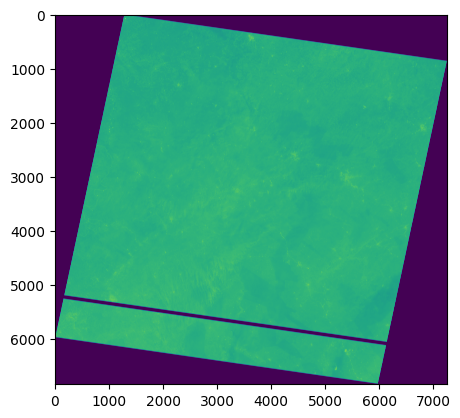

In [9]:
import rasterio
from rasterio.plot import show

# Ouvrir une image GeoTIFF
with rasterio.open('./Mjini_Hackathon/LS07_RMPS_ETM_GTC_1P_20000202T102012_20000202T102041_004264_0195_0055_F333/LS07_RMPS_ETM_GTC_1P_20000202T102012_20000202T102041_004264_0195_0055_F333.TIFF/LE71950552000033ESA00_B2.TIF') as src:
    img_data = src.read()  # Lire les bandes
    show(img_data)  # Afficher l'image


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import rasterio
import numpy as np

# Charger les données d'image
with rasterio.open('./Mjini_Hackathon/LS07_RMPS_ETM_GTC_1P_20000202T102012_20000202T102041_004264_0195_0055_F333/LS07_RMPS_ETM_GTC_1P_20000202T102012_20000202T102041_004264_0195_0055_F333.TIFF/LE71950552000033ESA00_B2.TIF') as src:
    img = src.read()  # Lire les bandes de l'image
    
# Aplatir les données pour les passer dans scikit-learn
X = img.reshape(-1, img.shape[0])
y = np.random.randint(0, 2, X.shape[0])  # Labels fictifs (0 = non urbain, 1 = urbain)

# Entraîner un modèle Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)


In [ ]:
def calculate_ndvi(nir_band, red_band):
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    return ndvi

# Charger les bandes NIR et Rouge (par exemple, bande 4 pour NIR, bande 3 pour rouge)
with rasterio.open('sentinel_2000.tif') as src:
    red_band = src.read(3)  # Bande rouge
    nir_band = src.read(4)  # Bande NIR

# Calculer le NDVI
ndvi_2000 = calculate_ndvi(nir_band, red_band)
